<a href="https://colab.research.google.com/github/weasel-codes/google-colab/blob/udemy-dl/SpaceVectorMachine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machine To Predict : Whether customer will buy an SUV or not
---

## Libraries Import

In [1]:
import numpy as np
import matplotlib.pyplot as plot
import pandas as pd

## Dataset Import

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:,-1].values
print(dataset)

     Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]


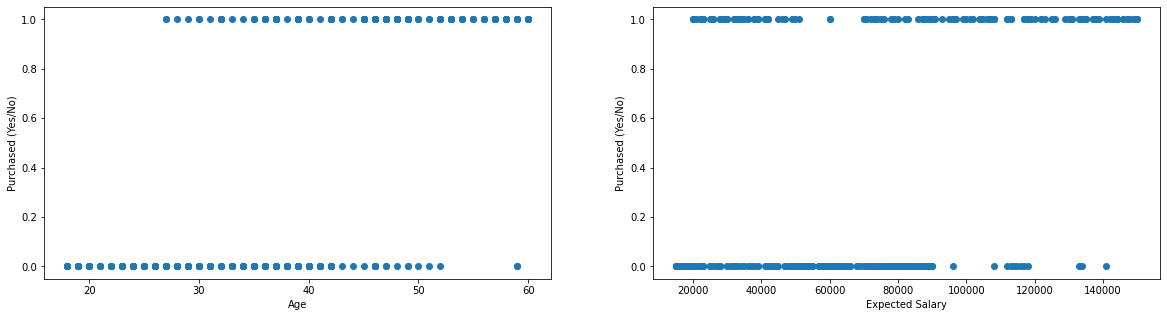

In [3]:
# Plotting dependent vs independent variable
plot.figure(figsize=(20,5))
plot.subplot(121)
plot.scatter(X[:,0], Y)
plot.xlabel("Age")
plot.ylabel("Purchased (Yes/No)")

plot.subplot(122)
plot.scatter(X[:,1], Y)
plot.xlabel("Expected Salary")
plot.ylabel("Purchased (Yes/No)")

plot.show()


## Split into Training and Testing set

In [4]:
from sklearn.model_selection import train_test_split as split
X_train, X_test, Y_train, Y_test = split(X, Y, test_size=0.2, random_state=1) #80:20 :: Train:Test

print("Train set for X : ", X_train.shape ,", Sample Data : \n",X_train[:10,:])
print("\n\nTrain set for Y : ", Y_train.shape ,", Sample Data : \n", Y_train[:10])
print("\n\nTest set for X : ", X_test.shape ,", Sample Data : \n", X_test[:10,:])
print("\n\nTest set for Y : ", Y_test.shape ,", Sample Data : \n", Y_test[:10])

Train set for X :  (320, 2) , Sample Data : 
 [[    29  28000]
 [    45  22000]
 [    46 117000]
 [    32  18000]
 [    22  81000]
 [    25  87000]
 [    48  33000]
 [    35  58000]
 [    47  23000]
 [    26  32000]]


Train set for Y :  (320,) , Sample Data : 
 [0 1 1 0 0 0 1 0 1 0]


Test set for X :  (80, 2) , Sample Data : 
 [[    36  33000]
 [    39  61000]
 [    36 118000]
 [    39 122000]
 [    26 118000]
 [    38  65000]
 [    20  36000]
 [    49  89000]
 [    31  18000]
 [    48 141000]]


Test set for Y :  (80,) , Sample Data : 
 [0 0 1 1 0 0 0 1 0 0]


## Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print("Train set for X : ", X_train.shape ,", Sample Data : \n",X_train[:10,:])
print("\n\nTest set for X : ", X_test.shape ,", Sample Data : \n ", X_test[:10,:])

Train set for X :  (320, 2) , Sample Data : 
 [[-0.80330081 -1.19121795]
 [ 0.75697997 -1.36859801]
 [ 0.85449752  1.43991958]
 [-0.51074816 -1.48685138]
 [-1.48592365  0.37563923]
 [-1.19337101  0.55301929]
 [ 1.04953262 -1.04340124]
 [-0.21819552 -0.30431766]
 [ 0.95201507 -1.33903467]
 [-1.09585346 -1.07296458]]


Test set for X :  (80, 2) , Sample Data : 
  [[-0.12067797 -1.04340124]
 [ 0.17187468 -0.21562763]
 [-0.12067797  1.46948292]
 [ 0.17187468  1.58773629]
 [-1.09585346  1.46948292]
 [ 0.07435713 -0.09737426]
 [-1.68095875 -0.95471121]
 [ 1.14705017  0.61214597]
 [-0.60826571 -1.48685138]
 [ 1.04953262  2.14943981]]


## Training SVM Model

In [6]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state=0) # We need to mention Kernel here : Linear(Classic SVM) or Non Linear
classifier.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

## Predicting a new result

In [7]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


## Predicting on test set

In [9]:
Y_pred = classifier.predict(X_test)

# Generate Confusion Matrix

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("Accuracy of model : ", accuracy_score(Y_test, Y_pred))
cm = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix : \n", cm)

Accuracy of model :  0.8375
Confusion Matrix : 
 [[42  6]
 [ 7 25]]


## Visualizing Outcome for Training Set

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


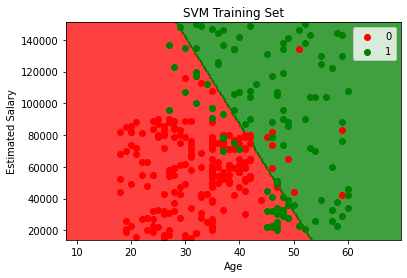

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
X_set, Y_set = sc.inverse_transform(X_train), Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM Training Set')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualizing Outcome for Test Dataset

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


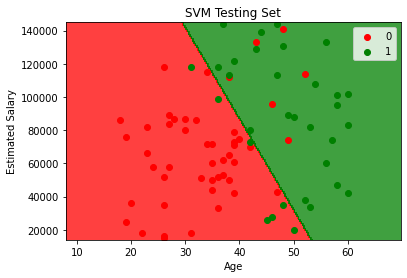

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM Testing Set')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# K-Fold Cross validation


Distinct accuracies for SVM :  [81.25  75.    87.5   87.5   81.25  78.125 84.375 96.875 81.25  87.5  ]
Average Accuracy SVM : 84.06 %
Standard Deviation in SVM accuracies : 5.84 %


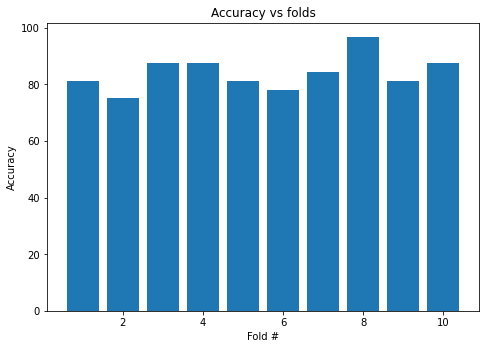

In [11]:
# For SVM
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = Y_train, cv = 10)
print("Distinct accuracies for SVM : ", accuracies*100)
print("Average Accuracy SVM : {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation in SVM accuracies : {:.2f} %".format(accuracies.std()*100))

fig = plot.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(np.arange(1,len(accuracies)+1), accuracies*100)
plot.xlabel("Fold #")
plot.ylabel("Accuracy")
plot.title("Accuracy vs folds")
plot.show()

# Grid Search Implementation
* Gamma can only be used with rbf kernel

In [12]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C' : [0.25, 0.5, 0.75, 1], 'kernel' : ['linear']},
              {'C' : [0.25, 0.5, 0.75, 1], 'kernel' : ['rbf'], 'gamma' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy', cv = 10, n_jobs = -1) # n_jobs : use all processors
grid_search.fit(X_train, Y_train)
best_accuracy = grid_search.best_score_
best_params = grid_search.best_params_

print("BEST Accuracy SVM : {:.2f} %".format(best_accuracy*100))
print("BEST params for SVM : ", best_params)


BEST Accuracy SVM : 93.12 %
BEST params for SVM :  {'C': 0.5, 'gamma': 0.7, 'kernel': 'rbf'}
